In [1]:
import sys

In [2]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from bluepysnap import Simulation as SnapSimulation

snap_sim = SnapSimulation("simulation_config.json")

In [4]:
print(
    snap_sim.time_start,
    snap_sim.time_stop,
    snap_sim.dt,
    # snap_sim.config,
    snap_sim.circuit,
)

0 1000.0 0.025 <bluepysnap.circuit.Circuit object at 0x7fff625f13c0>


In [5]:
print(snap_sim.reports)

{'NaConcAllCmps': <bluepysnap.frame_report.SomaReport object at 0x7fffe2fc3fa0>, 'NaCurrCompSum': <bluepysnap.frame_report.SomaReport object at 0x7fffe2fc2a70>, 'ATPConcAllCmps': <bluepysnap.frame_report.SomaReport object at 0x7fff612d0a30>, 'voltage': <bluepysnap.frame_report.SomaReport object at 0x7fff612d1540>}


In [6]:
dir(snap_sim)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_config',
 '_simulation_config_path',
 'circuit',
 'conditions',
 'config',
 'dt',
 'node_sets',
 'output',
 'reports',
 'run',
 'simulator',
 'spikes',
 'time_start',
 'time_stop',
 'time_units',
 'to_libsonata']

In [7]:
dir(snap_sim.circuit)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_circuit_config_path',
 '_config',
 'config',
 'edges',
 'get_edge_population_config',
 'get_node_population_config',
 'node_sets',
 'nodes',
 'partial_config',
 'to_libsonata']

In [8]:
snap_report_voltage = snap_sim.reports["voltage"]
snap_report_ATPConcAllCmps = snap_sim.reports["ATPConcAllCmps"]

print(snap_report_voltage.population_names)

HDF5-DIAG: Error detected in HDF5 (1.14.0) thread 0:
  #000: /nvme/bbpcihpcdeploy/1363853/spack-stage/spack-stage-hdf5-1.14.0-einzmbzgk5cfbxadv7coddds4uhwed67/spack-src/src/H5F.c line 836 in H5Fopen(): unable to synchronously open file
    major: File accessibility
    minor: Unable to open file
  #001: /nvme/bbpcihpcdeploy/1363853/spack-stage/spack-stage-hdf5-1.14.0-einzmbzgk5cfbxadv7coddds4uhwed67/spack-src/src/H5F.c line 796 in H5F__open_api_common(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #002: /nvme/bbpcihpcdeploy/1363853/spack-stage/spack-stage-hdf5-1.14.0-einzmbzgk5cfbxadv7coddds4uhwed67/spack-src/src/H5VLcallback.c line 3863 in H5VL_file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: /nvme/bbpcihpcdeploy/1363853/spack-stage/spack-stage-hdf5-1.14.0-einzmbzgk5cfbxadv7coddds4uhwed67/spack-src/src/H5VLcallback.c line 3675 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor:

RuntimeError: Unable to open file /gpfs/bbp.cscs.ch/home/cattabia/multiscale_run/RESULTS/voltage.h5 (File accessibility) Unable to open file

In [10]:
filtered_voltage = snap_report_voltage.filter()
filtered_ATPConcAllCmps = snap_report_ATPConcAllCmps.filter()

data_voltage = filtered_voltage.report
data_ATPConcAllCmps = filtered_ATPConcAllCmps.report

In [11]:
data_voltage = np.array(data_voltage)
print(
    f"data_voltage : mean={data_voltage.mean()}, min={data_voltage.min()}, max={data_voltage.max()}"
)

data_voltage : mean=-82.23531341552734, min=-88.02396392822266, max=29.16018295288086


In [12]:
data_ATPConcAllCmps = np.array(data_ATPConcAllCmps)
print(
    f"data_ATPConcAllCmps : mean={data_ATPConcAllCmps.mean()}, min={data_ATPConcAllCmps.min()}, max={data_ATPConcAllCmps.max()}"
)

data_ATPConcAllCmps : mean=1.1679415702819824, min=0.13684894144535065, max=1.3999994993209839


<AxesSubplot:xlabel='Time [ms]', ylabel='Avg volt. [mV]'>

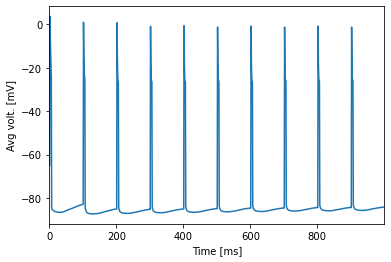

In [13]:
filtered_voltage.trace()
#plt.savefig("./RESULTS/voltage_trace.pdf")

<AxesSubplot:xlabel='Time [ms]', ylabel='Avg volt. [mM]'>

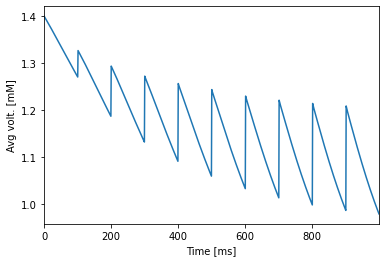

In [14]:
filtered_ATPConcAllCmps.trace()
#plt.savefig("./RESULTS/ATPConcAllCmps_trace.pdf")

In [15]:
snap_report_voltage_pop = snap_report_voltage["All"]
snap_report_ATPConcAllCmps_pop = snap_report_ATPConcAllCmps["All"]

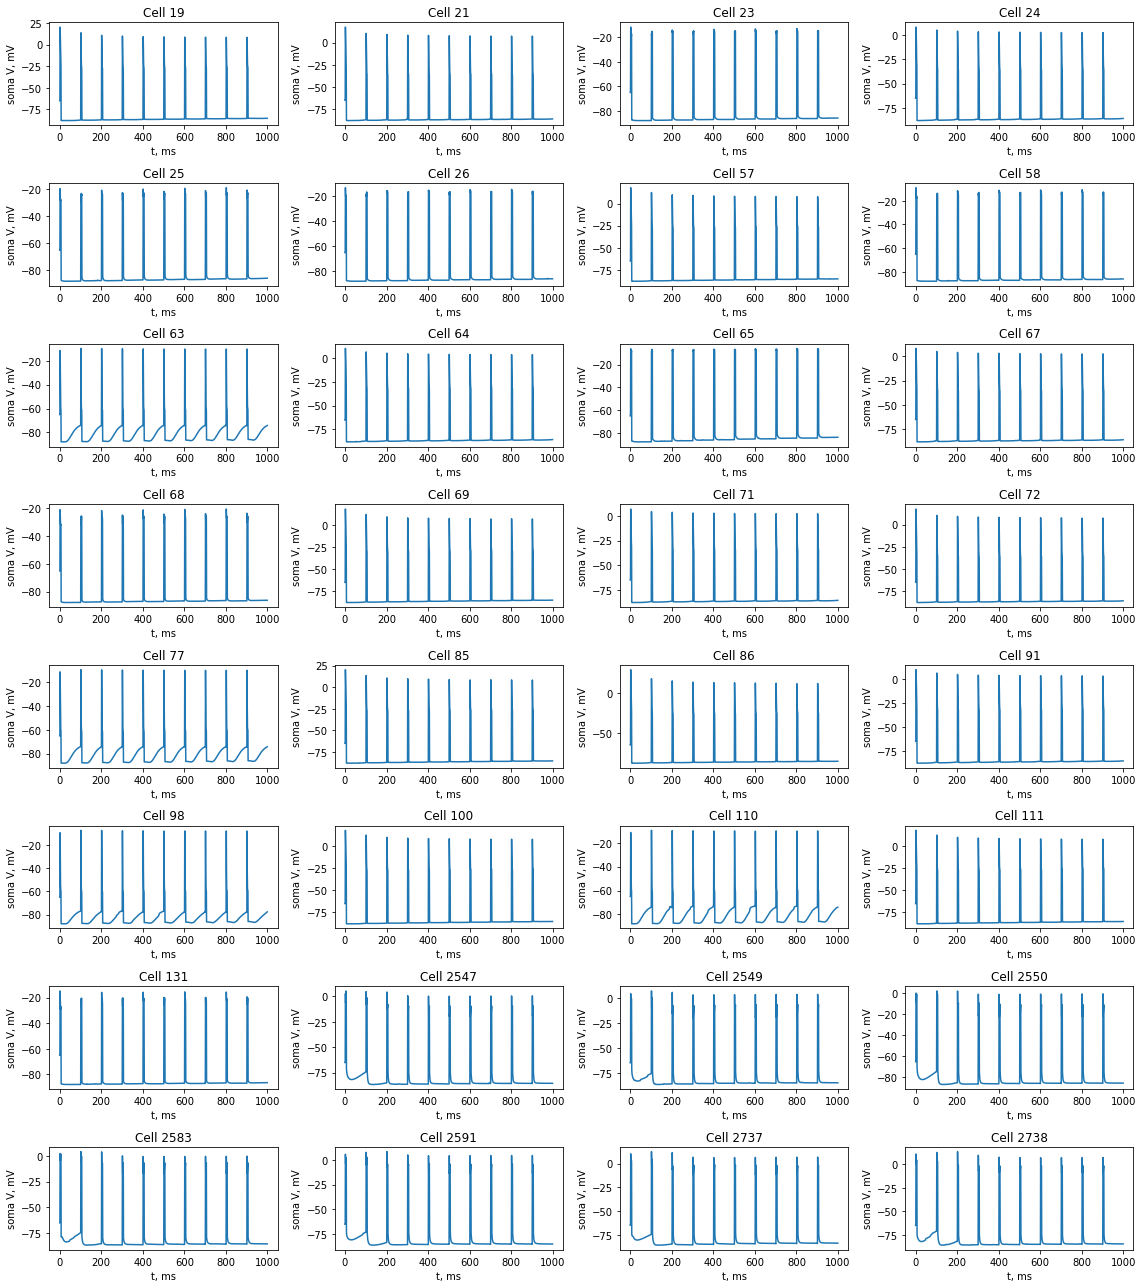

In [16]:
fig, axs = plt.subplots(8, 4, figsize=(16, 18))

for c, id in enumerate(snap_report_voltage_pop.node_ids):
    x = c % 4
    y = c // 4
    axs[y, x].plot(
        snap_report_voltage_pop.get(
            group=snap_report_voltage_pop.node_ids[c],
            t_start=snap_sim.time_start,
            t_stop=snap_sim.time_stop,
        )
    )
    axs[y, x].set_title(f"Cell {id}")

for ax in axs.flat:
    ax.set(xlabel="t, ms", ylabel="soma V, mV")

fig.tight_layout()

#plt.savefig("./RESULTS/voltages.pdf")

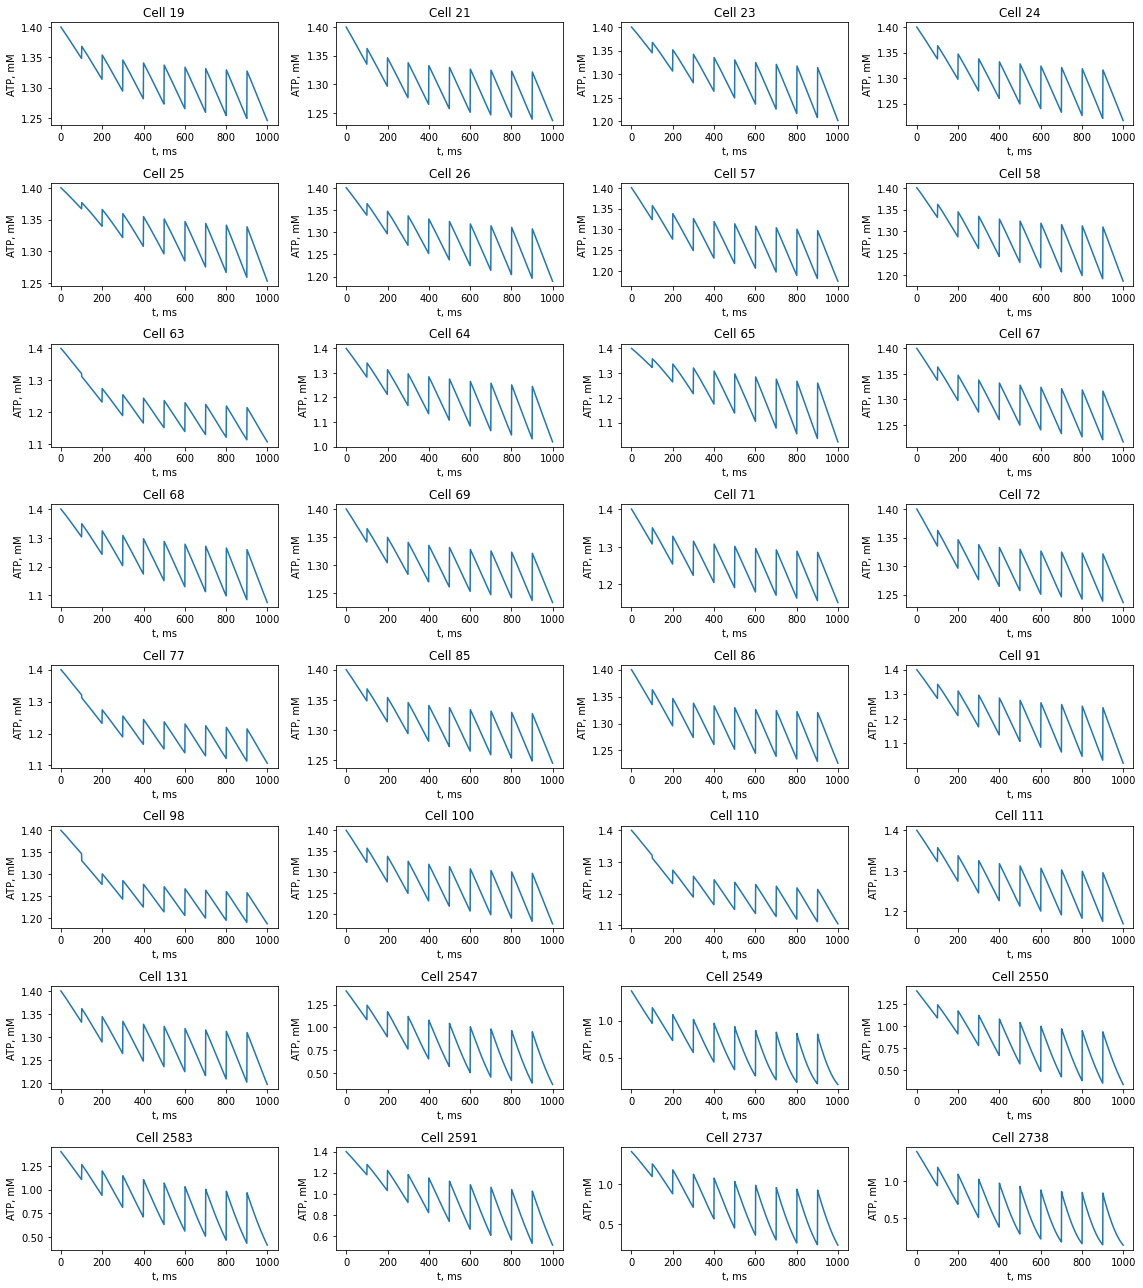

In [17]:
fig, axs = plt.subplots(8, 4, figsize=(16, 18))

for c, id in enumerate(snap_report_ATPConcAllCmps_pop.node_ids):
    x = c % 4
    y = c // 4
    axs[y, x].plot(
        snap_report_ATPConcAllCmps_pop.get(
            group=snap_report_ATPConcAllCmps_pop.node_ids[c],
            t_start=snap_sim.time_start,
            t_stop=snap_sim.time_stop,
        )
    )
    axs[y, x].set_title(f"Cell {id}")

for ax in axs.flat:
    ax.set(xlabel="t, ms", ylabel="ATP, mM")

fig.tight_layout()

#plt.savefig("./RESULTS/ATPConc.pdf")